In [ ]:
import torch
from fastai.vision.all import *
import torchvision.models as models
from torchvision import transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn as nn
import pandas as pd

In [ ]:
from fastai.data.transforms import Category

In [ ]:
import gdown

file_id = '1-35CVeT1Nqaj48zU5uoRI1vma82--ahE'  # Replace with the actual file ID
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'file.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1MD6xgMhnH-HkT1xzsIGZOcYJwMbR4dZK
From (redirected): https://drive.google.com/uc?id=1MD6xgMhnH-HkT1xzsIGZOcYJwMbR4dZK&confirm=t&uuid=d4cb737c-0b0a-4b64-8443-1e85cf0a38fd
To: /content/file.zip
100%|██████████| 2.68G/2.68G [00:43<00:00, 61.1MB/s]


'file.zip'

In [ ]:
import gdown

file_id = '1-35CVeT1Nqaj48zU5uoRI1vma82--ahE'  # Replace with the actual file ID
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'type_recognition2.pkl', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-35CVeT1Nqaj48zU5uoRI1vma82--ahE
From (redirected): https://drive.google.com/uc?id=1-35CVeT1Nqaj48zU5uoRI1vma82--ahE&confirm=t&uuid=b7d44e03-52af-469d-b28f-9f3709a9d30f
To: /content/type_recognition2.pkl
100%|██████████| 88.3M/88.3M [00:00<00:00, 190MB/s]


'type_recognition2.pkl'

In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('file.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_files')

In [ ]:
file_id = '1SSG1570XUsh707kaH47uvqufH_lTDUrg'  # Replace with the actual file ID
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'type_recognition.pkl', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1SSG1570XUsh707kaH47uvqufH_lTDUrg
From (redirected): https://drive.google.com/uc?id=1SSG1570XUsh707kaH47uvqufH_lTDUrg&confirm=t&uuid=bf8d5326-c44f-4c6e-ab32-d86af59fd2c2
To: /content/type_recognition.pkl
100%|██████████| 87.6M/87.6M [00:00<00:00, 101MB/s]


'type_recognition.pkl'

In [ ]:
file_id = '1_4MhBYAxZWT9A9eVQ_7ZsPN-F_6rdGxu'  # Replace with the actual file ID
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'class_recognition.pkl', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1_4MhBYAxZWT9A9eVQ_7ZsPN-F_6rdGxu
From (redirected): https://drive.google.com/uc?id=1_4MhBYAxZWT9A9eVQ_7ZsPN-F_6rdGxu&confirm=t&uuid=0d878f78-46f2-4993-871e-e0f9a93cb1fc
To: /content/class_recognition.pkl
100%|██████████| 87.5M/87.5M [00:01<00:00, 57.3MB/s]


'class_recognition.pkl'

In [ ]:
file_id = '1-27rkerTPl-bWlImyx9gZPrjD8fehNbA'  # Replace with the actual file ID
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'class_recognition2.pkl', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-27rkerTPl-bWlImyx9gZPrjD8fehNbA
From (redirected): https://drive.google.com/uc?id=1-27rkerTPl-bWlImyx9gZPrjD8fehNbA&confirm=t&uuid=1393f172-984d-4063-afd0-938387c99b47
To: /content/class_recognition2.pkl
100%|██████████| 96.0M/96.0M [00:01<00:00, 61.1MB/s]


'class_recognition2.pkl'

In [ ]:
MODEL_PATH = "/content/type_recognition2.pkl"
DATA_PATH = "/content/extracted_files/img"
CLASSES_PATH = "/content/classes.txt"
MODEL_PATH2="/content/class_recognition2.pkl"

In [ ]:
def get_x(r): return r['image_name']
def get_y(r): return r['labels'].split(',')

In [ ]:
learn_second=load_learner(MODEL_PATH2)
learn=load_learner(MODEL_PATH)

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/data.xlsx')

In [ ]:
image_names = df.iloc[:, 0].tolist()


In [ ]:
image_paths = [f'{name}' for name in image_names]

In [ ]:
predictions=[None]*10
predictions2=[None]*10

In [ ]:
for i in range(len(image_names)):
  img = PILImage.create(image_names[i])
  pred, _, _ = learn.predict(img)
  pred2,_,_=learn_second.predict(img)
  predictions[i]=pred
  predictions2[i]=pred2

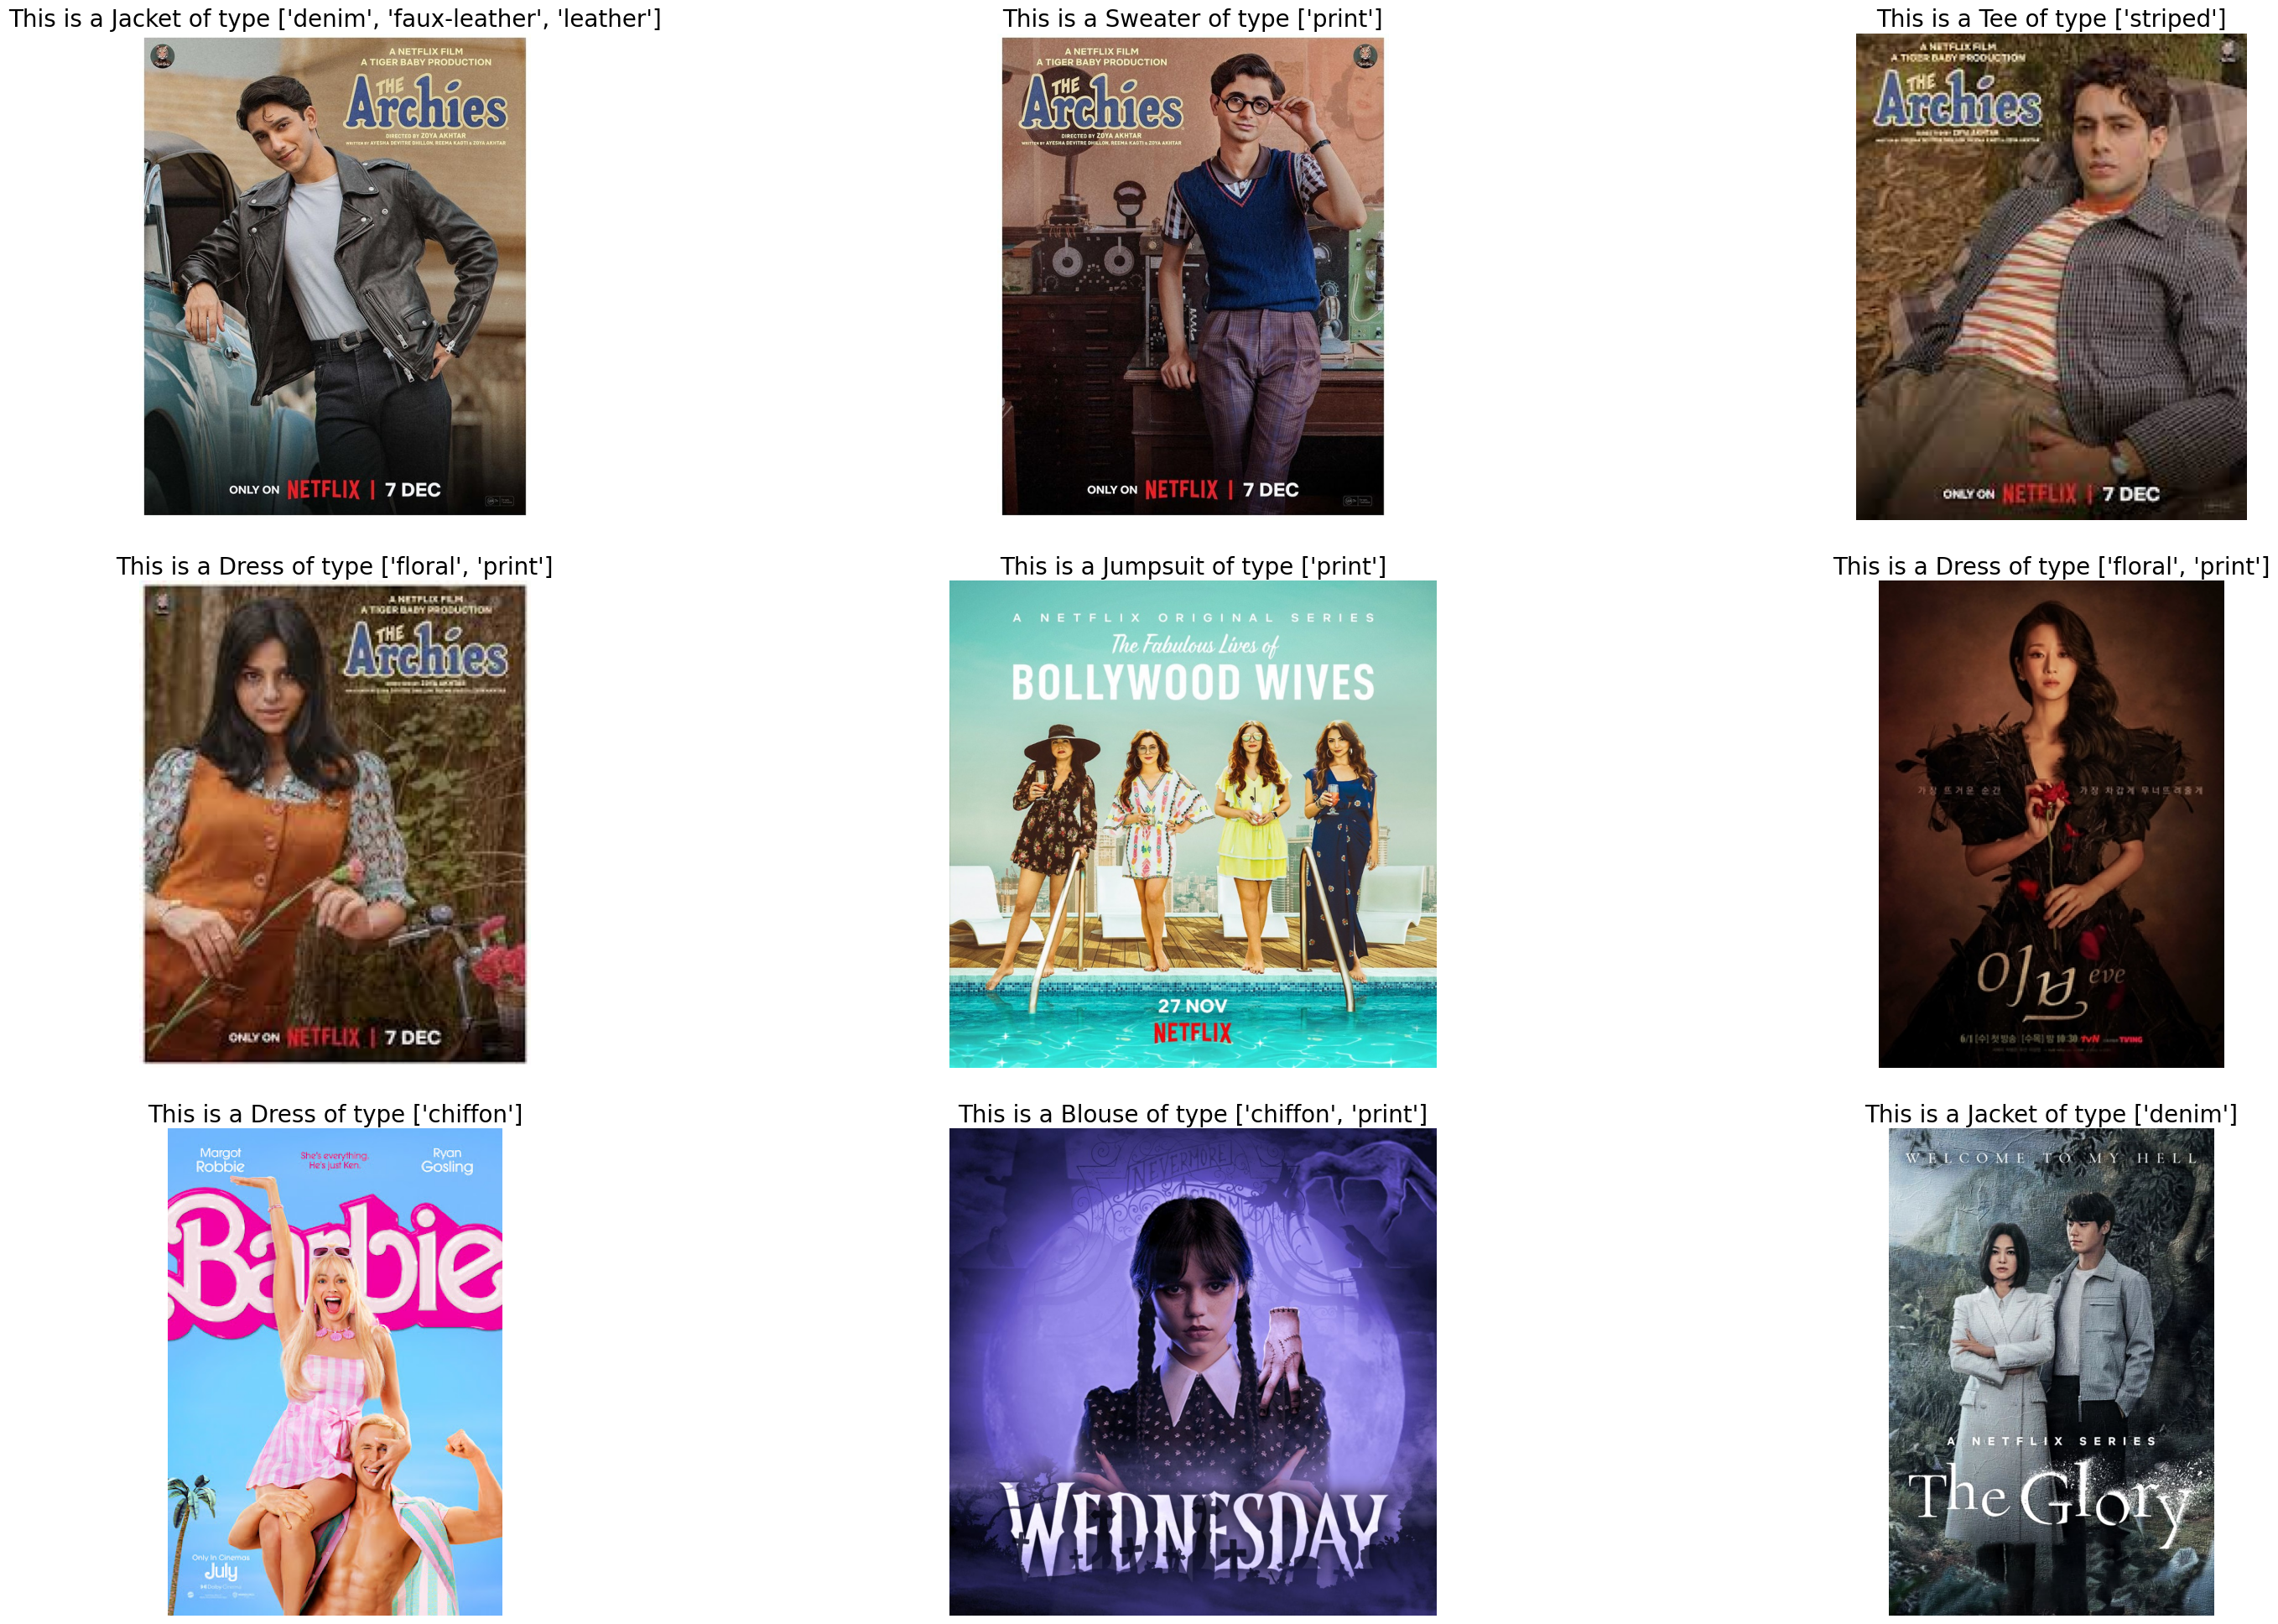

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(35, 20))
axes = axes.flatten()

for i ,(ax, img_path)  in enumerate(zip(axes, image_paths)):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(f'This is a {predictions2[i]} of type {predictions[i]}',fontsize=20)

    ax.axis('off')  # Hide axes

plt.tight_layout(pad=3.0)
plt.show()